In [27]:
import pandas as pd

BASE = "Dados/engajamento_tratado.xlsx"

df = pd.read_excel(BASE)
df.head(5)

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816
3,Vídeo,2021-09-12,5115,49,Produtos,N,N,N,5164
4,Foto,2021-09-13,4392,45,Produtos,S,N,N,4437


In [28]:
df.describe()

,Data,Curtidas,Comentários,Interacoes
count,52,52.000000,52.000000,52.000000
mean,2021-12-23 04:36:55.384615424,12262.730769,189.500000,12452.230769
min,2021-09-11 00:00:00,2807.000000,9.000000,2816.000000
25%,2021-10-23 06:00:00,5492.000000,69.500000,5562.500000
50%,2022-01-05 00:00:00,9603.000000,128.000000,9773.500000
75%,2022-02-15 12:00:00,17621.750000,265.250000,17920.750000
max,2022-03-27 00:00:00,37351.000000,852.000000,37853.000000
std,NaN,8165.875326,170.687709,8299.390088


### Analisando visualmente as curtidas com base no describe

- A postagem com o menor número de curtidas foi 2807 
- A postagem com o maior número de curtidas foi 37351 (bem discrepante)

Vamos verificar como estão essas curtidas ao longo do tempo:

<Axes: xlabel='Data', ylabel='Curtidas'>

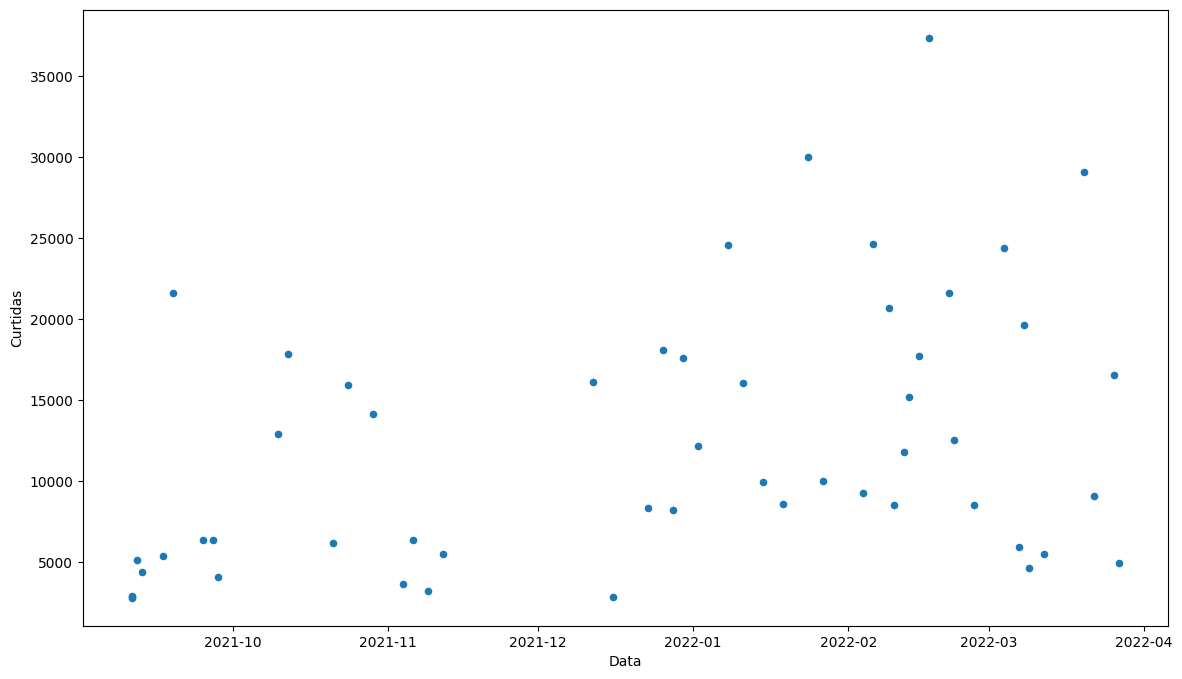

In [29]:
df.plot(kind='scatter', x="Data", y="Curtidas", figsize=(14,8))

Já podemos ver que no tempo não tem um aumento consistente de curtidas que possa indicar a relação com um número alto ou baixo de curtidas. A data não é um fator tão predominante que influencia nas curtidas

Agora iremos colocar curtidas e comentários juntos no gráfico para vermos a correlação entre os dois

<Axes: xlabel='Data', ylabel='Comentários'>

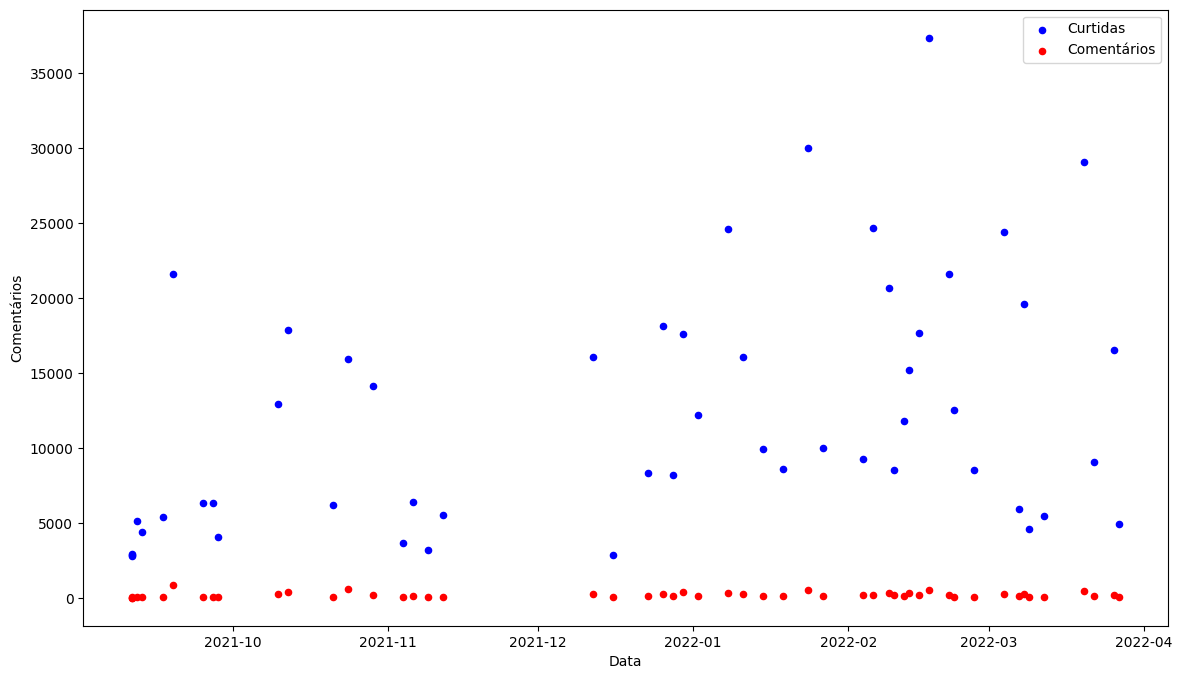

In [30]:
ax = df.plot(kind='scatter', x="Data", y="Curtidas", figsize=(14,8), color="blue", label="Curtidas")
df.plot(kind="scatter", x="Data", y="Comentários", label="Comentários", color="red", figsize=(14,8), ax=ax)

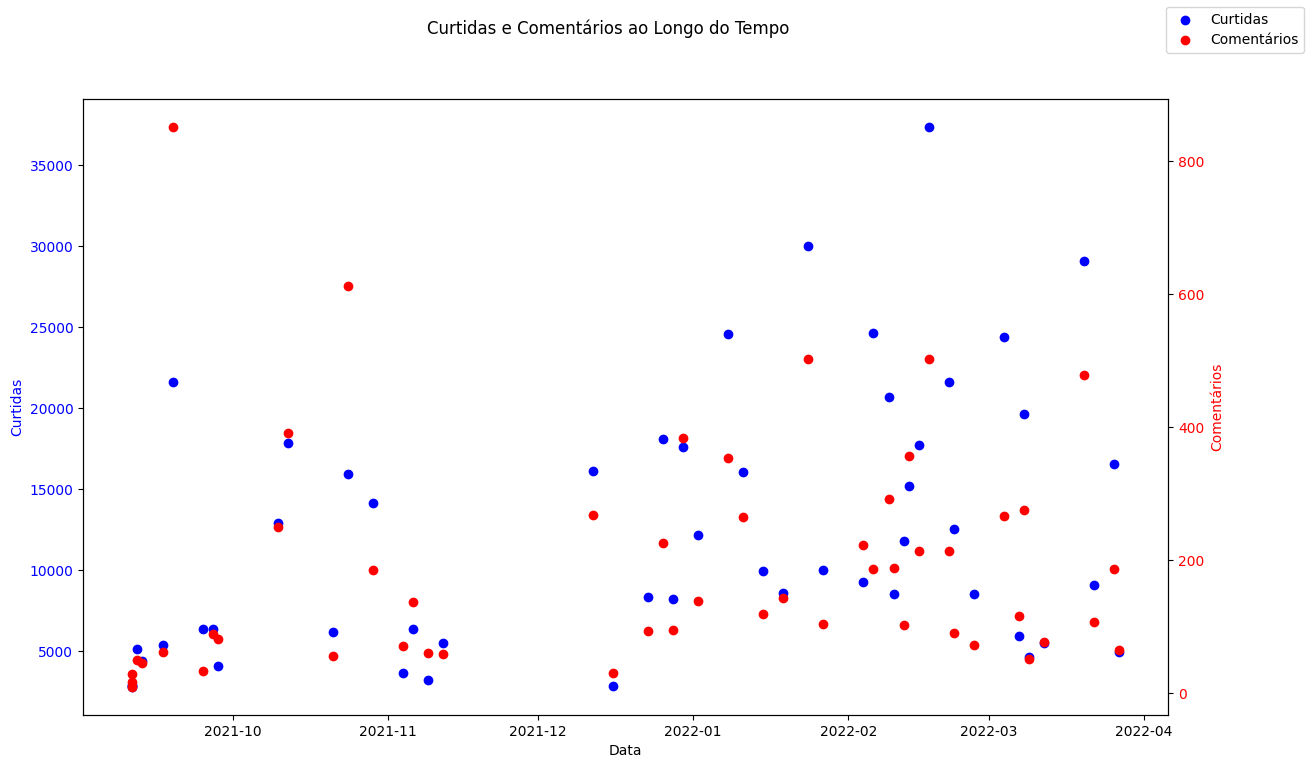

In [31]:
# Gráfico mais avançado (COM DOIS EIXOS Y DIFERENTES), aprenderemos isso no próximo módulo ainda!!

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 8))

# Primeiro eixo Y - Curtidas
ax1.scatter(df["Data"], df["Curtidas"], color="blue", label="Curtidas")
ax1.set_xlabel("Data")
ax1.set_ylabel("Curtidas", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Segundo eixo Y - Comentários
ax2 = ax1.twinx()
ax2.scatter(df["Data"], df["Comentários"], color="red", label="Comentários")
ax2.set_ylabel("Comentários", color="red")
ax2.tick_params(axis='y', labelcolor="red")

# Título e legenda combinada
fig.suptitle("Curtidas e Comentários ao Longo do Tempo")
fig.legend(["Curtidas", "Comentários"], loc="upper right")

plt.show()


## Analisar os 5 registros com mais e menos curtidas

In [32]:
df.sort_values(by="Curtidas", ascending=False).head()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
39,Foto,2022-02-17,37351,502,Promoções,S,S,N,37853
30,Reels,2022-01-24,29981,502,Trends,S,S,N,30483
48,Foto,2022-03-20,29084,479,Datas comemorativas/Promoções,S,S,N,29563
33,Foto,2022-02-06,24655,186,Influenciadores,S,S,N,24841
26,Foto,2022-01-08,24585,354,Datas comemorativas,S,S,S,24939


In [33]:
df.sort_values(by="Curtidas", ascending=False).tail()

,Tipo,Data,Curtidas,Comentários,Tags,Pessoas,Campanhas,Carrossel,Interacoes
17,Vídeo,2021-11-09,3213,60,Produtos,N,N,N,3273
1,Foto,2021-09-11,2930,28,Loja/Produtos,N,N,N,2958
20,Foto,2021-12-16,2881,29,Produtos,N,N,N,2910
0,Foto,2021-09-11,2858,16,Loja,N,N,N,2874
2,Foto,2021-09-11,2807,9,Loja,N,N,N,2816


- Fazendo essa análise visual simples das publicações mais curtidas e das menos curtidas, nós podemos perceber que as mais curtidas sempre envolvem pessoas e as menos curtidas não envolvem pessoas

In [34]:
pessoas = df.copy()

pessoas.loc[pessoas["Pessoas"] == "N", "Pessoas"] = '0'                                                 # tranformei a coluna de N para 0
pessoas.loc[pessoas["Pessoas"] == "S", "Pessoas"] = '1'                                                 # tranformei a coluna de S para 1
pessoas["Pessoas"] = pessoas["Pessoas"].astype(int)                                                     # transformei a coluna para o tipo inteiro
postagens_pessoas = pessoas["Pessoas"].sum()                                                            # fiz a soma para ver a quantidade de 1
postagens_sem_pessoas = pessoas["Pessoas"].count() - pessoas["Pessoas"].sum()                           # fiz a subtração para saber a quantidade de postagens sem pessoas
total = pessoas["Pessoas"].count()                                                                      # fiz a contagem do total de linhas, ou seja, total de publicações

print(f"{postagens_pessoas/total:.2%}")

76.92%


Interessante, a maioria das publicações tem pessoas, mas podemos fazer essas análise para o restante das colunas, como postagens que possuem ou não carrossel, postagens com o maior e menor número de comentários etc

Outra ideia, é pegar as publicações a partir do mês de janeiro de 2022 que as postagens tiveram um aumento geral no número de curtidas e a partir dessa data analisar, as com 5 maiores números de curtidas e 5 menores. Poderemos chegar em outra conclusões


In [ ]:
# Outro jeito de calcular o percentual, utilizando o value counts()

vc = df.Pessoas.value_counts().reset_index()

sem_pessoas = vc.loc[vc.Pessoas == "N","count"]
com_pessoas = vc.loc[vc["Pessoas"] == "S", "count"]

sem_pessoas = int(sem_pessoas.iloc[0])
com_pessoas = int(com_pessoas.iloc[0])
total = df["Pessoas"].count()

print(f"{com_pessoas/total:.2%}")

76.92%
